# Generating Std and Mean for Inputs. 


In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Make the gym environment
env_name = 'CartPole-v0'
#env_name = 'InvertedPendulum-v1'
env_name = 'HalfCheetah-v1'
env = gym.make(env_name)
max_path_length = env.spec.max_episode_steps
min_timesteps_per_batch=100
n_iter = 100
total_timesteps = 0
animate = False
print(env_name)

[2017-09-19 23:05:25,304] Making new env: HalfCheetah-v1


HalfCheetah-v1


In [20]:
discrete = isinstance(env.action_space, gym.spaces.Discrete)
discrete

False

In [21]:
#env.action_space.n

In [22]:
def pathlength(path):
    return len(path["reward"])

In [23]:
for itr in range(n_iter):
    print(itr)

    # Collect paths until we have enough timesteps
    timesteps_this_batch = 0
    paths = []
    while True:
        ob = env.reset()
        obs, acs, rewards = [], [], []
        animate_this_episode=(len(paths)==0 and (itr % 10 == 0) and animate)
        steps = 0
        while True:
            if animate_this_episode:
                env.render()
                time.sleep(0.05)
            obs.append(ob)
            ac = env.action_space.sample()
            acs.append(ac)
            ob, rew, done, _ = env.step(ac)
            rewards.append(rew)
            steps += 1
            if done or steps > max_path_length:
                env.render(close=True)
                break
        path = {"observation" : np.array(obs),
                "reward" : np.array(rewards),
                "action" : np.array(acs)}
        paths.append(path)
        timesteps_this_batch += pathlength(path)
        if timesteps_this_batch > min_timesteps_per_batch:
            break
    total_timesteps += timesteps_this_batch

# Build arrays for observation, action for the policy gradient update by concatenating
# across paths
ob_no = np.concatenate([path["observation"] for path in paths])
ac_na = np.concatenate([path["action"] for path in paths])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [24]:
print(np.shape(ob_no))
print(np.shape(ac_na))

(1000, 17)
(1000, 6)


In [25]:
#ac_na

In [26]:
mean_obs = np.mean(ob_no,axis=0)
std_obs = np.std(ob_no,axis=0)
print(mean_obs)
print(std_obs)

[-0.08897979  0.06045691  0.00606582  0.03286684 -0.00546835  0.00853905
 -0.07757916 -0.04827853 -0.1091644  -0.01696296 -0.00120514  0.01842537
 -0.03331179  0.0185279  -0.00722016  0.01098511 -0.00469955]
[ 0.07056412  0.12045606  0.25450298  0.27114851  0.26616139  0.32092694
  0.28055816  0.29137291  0.76916787  0.76194472  1.58065688  5.70691632
  6.77691315  7.01815167  6.30715576  6.38157076  6.25814326]


In [27]:
np.save('mean_obs'+env_name+'.npy',mean_obs)
np.save('std_obs'+env_name+'.npy',std_obs)

In [28]:
mean_obs = np.load('mean_obs'+env_name+'.npy')
std_obs = np.load('std_obs'+env_name+'.npy')
print(mean_obs)
print(std_obs)


[-0.08897979  0.06045691  0.00606582  0.03286684 -0.00546835  0.00853905
 -0.07757916 -0.04827853 -0.1091644  -0.01696296 -0.00120514  0.01842537
 -0.03331179  0.0185279  -0.00722016  0.01098511 -0.00469955]
[ 0.07056412  0.12045606  0.25450298  0.27114851  0.26616139  0.32092694
  0.28055816  0.29137291  0.76916787  0.76194472  1.58065688  5.70691632
  6.77691315  7.01815167  6.30715576  6.38157076  6.25814326]


In [29]:
obs_normed = (ob_no.copy()-mean_obs)/std_obs


mean [  8.45767900e-16   2.50244270e-16  -2.02060590e-17  -1.06581410e-17
  -1.29063427e-17   4.32986980e-18   1.18571819e-16  -6.58362254e-17
   4.35207426e-17   5.32907052e-18   3.59712260e-17  -2.13162821e-17
  -9.10382880e-18   3.31401573e-17  -9.04831765e-18   1.18793864e-17
  -8.88178420e-19]
std [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


([array([   0.,    0.,    5.,   45.,  132.,  337.,  314.,  118.,   34.,   15.]),
  array([   3.,    6.,    4.,   22.,  132.,  331.,  330.,  138.,   26.,    8.]),
  array([   0.,    0.,    0.,   41.,  180.,  271.,  309.,  157.,   41.,    1.]),
  array([   0.,    0.,    4.,   43.,  162.,  285.,  311.,  154.,   40.,    1.]),
  array([   0.,    0.,    0.,    9.,  219.,  288.,  273.,  170.,   37.,    4.]),
  array([   0.,    0.,    5.,   46.,  147.,  302.,  297.,  169.,   34.,    0.]),
  array([   0.,    0.,    2.,   47.,  147.,  324.,  288.,  147.,   40.,    5.]),
  array([   0.,    0.,    0.,   16.,  214.,  283.,  276.,  162.,   49.,    0.]),
  array([   0.,    0.,    8.,   36.,  147.,  308.,  306.,  157.,   35.,    3.]),
  array([   0.,    0.,    1.,   44.,  160.,  312.,  280.,  152.,   50.,    1.]),
  array([   0.,    1.,    5.,   32.,  161.,  322.,  292.,  142.,   41.,    4.]),
  array([   0.,    0.,    3.,   42.,  163.,  277.,  320.,  164.,   29.,    2.]),
  array([   0.,    0.,    3.

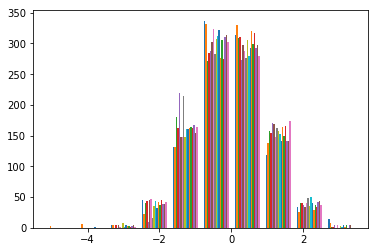

In [30]:
print('mean {0}'.format(np.mean(obs_normed,axis=0)))
print('std {0}'.format(np.std(obs_normed,axis=0)))
plt.hist(obs_normed)

-304.937924528


(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([-305.43792453, -305.33792453, -305.23792453, -305.13792453,
        -305.03792453, -304.93792453, -304.83792453, -304.73792453,
        -304.63792453, -304.53792453, -304.43792453]),
 <a list of 10 Patch objects>)

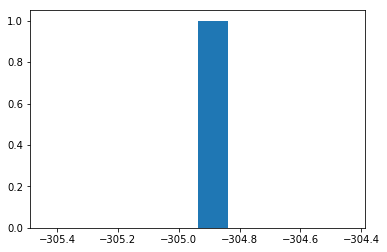

In [31]:
rewards_per_ep = [np.sum(path["reward"]) for path in paths]
print(np.mean(rewards_per_ep))
plt.hist(rewards_per_ep)
